In [1]:
import warnings
import sys
import os
import pathlib
import torch 
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

warnings.filterwarnings('ignore')
sys.path.insert(0, str(pathlib.Path.cwd()/"src"))
%load_ext autoreload
%autoreload 2


In [2]:
import loaders.goes
import fields.vector_field

In [11]:
date = "2024-09-18"
band = 9

# Load data
dsf = loaders.goes.discrete_scalar_field(date=date, 
                                        band = band, 
                                        start = "00:00", 
                                        end = "04:00", 
                                        extent=(-86.1, -75.1, 30, 40.1))



seconds = dsf.coord_field.T[dsf.coord_field.T.size(0)//2]
t = time.strftime("%H:%M", time.gmtime(int(seconds)))
dvf = loaders.goes.discrete_vector_field(date = date, 
                                         time = t,
                                         band = band,
                                         extent=(-86.1, -75.1, 30, 40.1))


dvf.coord_field.T = dsf.coord_field.T[dsf.coord_field.T.size(0)//2]
dists = torch.cdist(dvf.coord_field.XY,dsf.coord_field.XY, p=2)  
indices = dists.argmin(dim=1)     
dvf.coord_field.XY = dsf.coord_field.XY[indices]




 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/262/00/OR_ABI-L2-CMIPC-M6C09_G16_s20242620001170_e20242620003549_c20242620004060.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/262/00/OR_ABI-L2-CMIPC-M6C09_G16_s20242620011170_e20242620013549_c20242620014033.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/262/00/OR_ABI-L2-CMIPC-M6C09_G16_s20242620006170_e20242620008549_c20242620009026.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/262/00/OR_ABI-L2-CMIPC-M6C09_G16_s20242620021170_e20242620023549_c20242620024032.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/262/00/OR_ABI-L2-CMIPC-M6C09_G16_s20242620031170_e20242620033549_c20242620034026.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/262/00/OR_ABI-L2-CMIPC

In [30]:
#fig = dsf.plot(factor = 2, gif = True)
#HTML(fig.to_html5_video())

In [31]:
cvf = fields.vector_field.ContinuousVectorField()
cvf.train(dsf, epochs=125, step = 4, factor = 3, size = 5000)


moved to gpu
Displacement #0 → product of spectral‐norms = 0.1243
Displacement #1 → product of spectral‐norms = 0.1279
Displacement #2 → product of spectral‐norms = 0.1250
Displacement #3 → product of spectral‐norms = 0.1346
Displacement #4 → product of spectral‐norms = 0.1234
Epoch 1/125 — Avg likelihood: 0.4759 — outputscale: 0.6931 — lengthscales: 1.08, 0.45, 0.45 — noise_var: 0.1102
Displacement #0 → product of spectral‐norms = 0.1260
Displacement #1 → product of spectral‐norms = 0.1398
Displacement #2 → product of spectral‐norms = 0.1379
Displacement #3 → product of spectral‐norms = 0.1596
Displacement #4 → product of spectral‐norms = 0.1261
Epoch 2/125 — Avg likelihood: 0.4823 — outputscale: 0.6931 — lengthscales: 1.08, 0.45, 0.45 — noise_var: 0.1203
Displacement #0 → product of spectral‐norms = 0.1352
Displacement #1 → product of spectral‐norms = 0.1607
Displacement #2 → product of spectral‐norms = 0.1716
Displacement #3 → product of spectral‐norms = 0.1994
Displacement #4 → pro

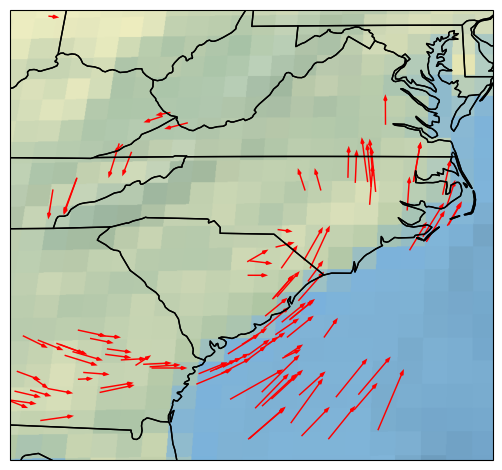

In [32]:
dvf.plot()

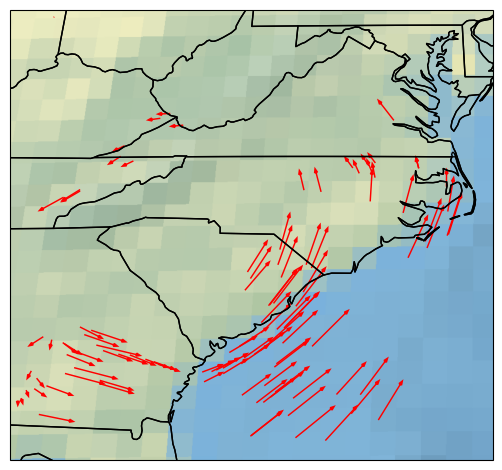

In [33]:
cvf.plot(dvf.coord_field)

In [34]:
cvf.RMSE(dvf, frame = 0)

6.78